# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ratings_train.csv to ratings_train.csv


<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its graph and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [2]:
import numpy as np

In [3]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [4]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

INFO :

Here in Dataframe we are provided pairs directly (in terms of adjacent columns)  
And Adjacency Matrix would be sparse as many cells would be 0, because for given user & item only 1 cell will posses non-zero val in a single Row (rest all 0)  

So as this adjacency matrix gonna 2D sparse matrix we can leverage `csr_matrix`  

Cell Val will be driven by `rating` column

user_id -> Row (indexes)  

item_id -> Col (indexes)

In [9]:
# TESING & VERIFYING
users = data.user_id
users.min(), users.max()

(0, 942)

In [10]:
# TESING & VERIFYING
users.unique().size

943

NOTE: 
As there are only 943 unique vals & also id's are assigned accordingly so we can use user_id values as index in sparse matrix

In [11]:
# TESING & VERIFYING
items = data.item_id
items.min(), items.max()

(0, 1680)

In [12]:
# TESING & VERIFYING
items.unique().size

1662

In [13]:
# TESING & VERIFYING

# +1 as size := index + 1
print('Total Rows in CSR Matrix : ', users.max()+1)
print('Total Cols in CSR Matrix : ', items.max()+1)  # This way 18 columns will be wasted directly yet (if considered Dense Matrix) i.e 18 Columns would be entire sparse

Total Rows in CSR Matrix :  943
Total Cols in CSR Matrix :  1681


Since the id's are note assigned sequentially for items, but as there is not much diff between max & size (ie 1680-1662 = 18),
So there will be 18 sparse columns (we know in advance)  

Alternative (Efficient Approach) :- Keep Map of items index -> item-id

In [14]:
from scipy.sparse import csr_matrix

users, items = data.user_id, data.item_id

row_idxs = users.values
col_idxs = items.values
cell_vals = data.rating.values
param = (cell_vals, (row_idxs, col_idxs))
adjacency_matrix = csr_matrix(param)

In [15]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [16]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

**The unique items in the given csv file are 1662 only . But the id's vary from 0-1681 but they are not continuous and hence 
you'll get matrix of size 943x1681.**

<font color='red'> SVD decompostion</font>

(WHY)  
SVD :   
we are performing SVD decomposition (ie Factorization) inorder to :  
a) Get smaller dimen feature embedding for users & items  
b) retain the relation between users & items at best similar to adj matrix 

Sample code for SVD decompostion

In [17]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [18]:
# ref :
# https://machinelearningmastery.com/singular-value-decomposition-for-dimensionality-reduction-in-python/

# Please use adjacency_matrix as matrix for SVD decompostion
U, SIGMA, V_T = randomized_svd(adjacency_matrix, n_components=10, n_iter=5, random_state=None)
V = V_T.T

<font color='red'>Compute mean of ratings</font>

In [19]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    return ratings.mean()

In [20]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [22]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [39]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros
    return np.zeros(dim)

In [40]:
# give the number of dimensions for b_i (Here b_i corresponds to users)
dim = adjacency_matrix.shape[0] 
b_i=initialize(dim)

In [41]:
# give the number of dimensions for c_j (Here c_j corresponds to movies)
dim = adjacency_matrix.shape[1] 
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [42]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [43]:
def derivative_db(user_id, item_id, rating, U, V, mu, alpha):
    '''In this function, we will compute dL/db_i'''
    der_reg = 2 * alpha * b_i[user_id] # derivative of regularization term
    der_loss = -2 * (rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id], V[item_id])) # derivative of Loss term
    der = der_reg + der_loss
    return der


<font color='cyan'>Grader function -4 </font>

In [44]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1T = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
V1 = V1T.T
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [45]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    der_reg = 2 * alpha * c_j[item_id]  # Reg term
    der_loss= -2 * (rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id],V[item_id]))  # Loss Term
    der = der_reg + der_loss
    return der

<font color='cyan'>Grader function - 5 </font>

In [46]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1.T,mu, alpha)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [47]:
(users == data.iloc[:, 0].values).all()

True

In [48]:
def pred(usr, itm):
  # Note here bi & cj needs to be scalar
  bi, cj = b_i[usr], c_j[itm]
  ui, vj = U[usr], V[itm]
  return mu + bi + cj + np.dot(ui, vj)

In [49]:
from sklearn.metrics import mean_squared_error
#from itertools import starmap

lr, tol = 0.01, 1e-3
y = ratings = data["rating"]
mse = []
nepochs = 30
prev_err = float('inf')
for e in range(nepochs):
  # Updation of Variables (Parameters)
  for user, item, rating in zip(users, items, ratings):
    #print(user, item, rating)
    grad_b = derivative_db(user, item, rating, U, V, mu, alpha)
    b_i[user] = b_i[user] - (lr * grad_b) 
    
    grad_c = derivative_dc(user, item, rating, U, V, mu, alpha)
    c_j[item] = c_j[item]- (lr * grad_c)  

  # Predictions
  *y_pred, = map(pred, users, items)
  
  err = mean_squared_error(y, y_pred)
  print(f'Epoch {e+1} --- MSE : {round(err, 5)}') 

  if abs(prev_err - err) < tol:
    break
  mse.append(err) 
  prev_err = err

Epoch 1 --- MSE : 0.88842
Epoch 2 --- MSE : 0.86187
Epoch 3 --- MSE : 0.85226
Epoch 4 --- MSE : 0.84765
Epoch 5 --- MSE : 0.84507
Epoch 6 --- MSE : 0.84346
Epoch 7 --- MSE : 0.84236
Epoch 8 --- MSE : 0.84158


<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

In [50]:
# epochs effectively
e

7

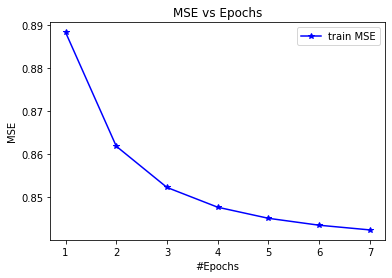

In [52]:
from matplotlib import pyplot as plt

epochs = range(1, e+1)
plt.plot(epochs, mse, 'b*-', label='train MSE', markersize=6)

plt.title('MSE vs Epochs')
plt.xlabel('#Epochs')
plt.ylabel('MSE')
plt.xticks(epochs)
plt.legend()

<br>

# <font color='red'> Task 2</font>

- For this task you have to consider the user_matrix U and the user_info.csv file.
- You have to consider is_male columns as  output features and rest as input features. Now you have to fit a model by posing this problem as binary classification task.
- You can apply any model like Logistic regression or Decision tree and check the performance of the model. 
- Do plot confusion matrix after fitting your model and write your observations how your model is performing in this task.

- Optional work- You can try scaling your U matrix.Scaling means changing the values of n_componenets while performing svd
  and then check your results.

In [53]:
from google.colab import files
uploaded = files.upload()

Saving user_info.csv.txt to user_info.csv.txt


In [80]:
import pandas as pd

df_user_info = pd.read_csv('user_info.csv')
df_user_info.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [94]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
df_user_info['age_t'] = normalizer.transform(df_user_info['age'].values.reshape((1, -1))).reshape(-1, 1) #fitting
df_user_info.head()

,user_id,age,is_male,orig_user_id,age_t
0,0,24,1,1,0.021609
1,1,53,0,2,0.047721
2,2,23,1,3,0.020709
3,3,24,1,4,0.021609
4,4,33,0,5,0.029713


In [58]:
U[0].size

10

NOTE:   
There are already 10 features for each user we got earlier via SVD  

Now we will consider new features from `user_info.csv` i.e  
{is_male, orig_user_id}

In [59]:
# Preparing Dataframe for SVD Derived features for Users

u_cols_derived = ['c'f'{i}' for i in range(1, 11)]
df_user_deriv = pd.DataFrame(U, columns=u_cols_derived)
df_user_deriv.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
0,0.066226,0.007889,-0.012532,-0.086136,0.024879,0.006635,0.079843,-0.027819,0.068195,0.019177
1,0.013644,-0.048895,0.056554,0.015803,-0.012037,0.017719,0.010819,-0.010407,0.027655,-0.007969
2,0.005438,-0.025128,0.020028,0.032835,0.035082,0.001925,0.007638,-0.000930,-0.021110,-0.003437
3,0.005704,-0.018211,0.010898,0.021870,0.013918,-0.014174,0.012243,-0.009060,-0.012668,0.005802
4,0.034122,0.009005,-0.044054,-0.016047,0.004327,-0.021491,0.095585,0.079299,-0.016373,0.029445


In [74]:
# TESING & VERIFYING

# Verifying the derived & original data
#(df_user_deriv[0] == data.where(data.user_id == 0).iloc[0]).all()
data[(data['user_id'] == 0) & (data['item_id'] == 124)]

,user_id,item_id,rating
594,0,124,3


In [78]:
# TESING & VERIFYING

adjacency_matrix[0, 124]

3

NOTE:

`df_user_deriv` is same as `adjacency_matrix` with only difference that the dimensions are truncated from **1681** -> **10** 

In [79]:
# TESING & VERIFYING
adjacency_matrix.shape, df_user_deriv.shape

((943, 1681), (943, 10))

In [81]:
# TESING & VERIFYING
df_user_info.shape, df_user_deriv.shape

((943, 4), (943, 10))

In [82]:
# TESING & VERIFYING
(df_user_deriv.index == df_user_info.index).all()

True

As both have same rows indexes we can perform direct concat between 2 dataframes

In [100]:
# Preparinf DataFrame for Logistic Regression Classification of is_Male

cols = ['age_t']
# Concat the Columns of both dataframe in horizontal direction
X = pd.concat([df_user_deriv, df_user_info[cols]], axis=1)
y = df_user_info['is_male']
X.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,age_t
0,0.066226,0.007889,-0.012532,-0.086136,0.024879,0.006635,0.079843,-0.027819,0.068195,0.019177,0.021609
1,0.013644,-0.048895,0.056554,0.015803,-0.012037,0.017719,0.010819,-0.010407,0.027655,-0.007969,0.047721
2,0.005438,-0.025128,0.020028,0.032835,0.035082,0.001925,0.007638,-0.000930,-0.021110,-0.003437,0.020709
3,0.005704,-0.018211,0.010898,0.021870,0.013918,-0.014174,0.012243,-0.009060,-0.012668,0.005802,0.021609
4,0.034122,0.009005,-0.044054,-0.016047,0.004327,-0.021491,0.095585,0.079299,-0.016373,0.029445,0.029713


In [101]:
# Logistic Regression -------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Here LogisticRegression is similar to SGDClassifier with loss=log, & you can consider it as a probabilistic way of solving problem
classifier = LogisticRegression()
classifier.fit(X, y)
# As Coef is nd Array & intercept is also Array
w = classifier.coef_[0]
b = classifier.intercept_[0]

#w,b

y_pred = classifier.predict(X)
confusion_matrix(y, y_pred)

array([[  0, 273],
       [  0, 670]])

In [102]:
mean_squared_error(y, y_pred)

0.28950159066808057